In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [3]:
train = pd.read_csv("parking_data/면적별_세대수_구분.csv")
train.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0


In [4]:
train["소형주택"]=train[["area10","area20","area30"]].sum(axis=1)/train["총세대수"]
train.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799


In [5]:
train["대중교통"] = train["노선수"]+train["버스"]
train.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211,3.0
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724,2.0
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881,4.0
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943,2.0
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799,6.0


In [6]:
train = train.drop(["빈집","노선수","버스"], axis=1)
train.head()

,단지코드,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통
0,C2515,545,아파트,경상남도,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211,3.0
1,C1407,1216,아파트,대전광역시,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724,2.0
2,C1945,755,아파트,경기도,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881,4.0
3,C1470,696,아파트,전라북도,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943,2.0
4,C1898,566,아파트,전라북도,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799,6.0


In [7]:
pre_train = pd.read_csv("parking_data/pre_train.csv", index_col=[0])
pre_train

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,49.20,19,7.0,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,51.08,34,7.0,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,51.73,34,7.0,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,51.96,114,7.0,142310,0.0,1.0,166.0,146.0


In [8]:
pre_train1 = pre_train.reset_index(drop=True)
pre_train1

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
0,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,49.20,19,7.0,116090,0.0,1.0,166.0,146.0
2865,C2532,239,아파트,강원도,51.08,34,7.0,142310,0.0,1.0,166.0,146.0
2866,C2532,239,아파트,강원도,51.73,34,7.0,142310,0.0,1.0,166.0,146.0
2867,C2532,239,아파트,강원도,51.96,114,7.0,142310,0.0,1.0,166.0,146.0


In [10]:
mean_area = pre_train1.groupby("단지코드").mean()[["전용면적"]].reset_index()
mean_area

,단지코드,전용면적
0,C1000,45.218571
1,C1004,39.136842
2,C1005,54.360000
3,C1013,46.142000
4,C1014,49.232857
...,...,...
406,C2663,41.005000
407,C2666,43.258333
408,C2670,40.918000
409,C2680,43.350000


In [12]:
train = pd.merge(train, mean_area, on="단지코드")
train

,단지코드,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통,전용면적
0,C2515,545,아파트,경상남도,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211,3.0,44.345714
1,C1407,1216,아파트,대전광역시,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724,2.0,41.253636
2,C1945,755,아파트,경기도,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881,4.0,50.510000
3,C1470,696,아파트,전라북도,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943,2.0,42.982500
4,C1898,566,아파트,전라북도,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799,6.0,42.575000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,C2586,90,아파트,제주특별자치도,12,42,36,0,0,0,0,0,0,66.0,57.0,1.000000,3.0,26.616000
407,C2035,492,아파트,강원도,0,156,156,180,0,0,0,0,0,521.0,246.0,0.634146,1.0,36.150000
408,C2020,40,아파트,부산광역시,20,5,15,0,0,0,0,0,0,25.0,19.0,1.000000,3.0,26.616667
409,C2437,90,아파트,충청북도,0,90,0,0,0,0,0,0,0,30.0,16.0,1.000000,1.0,24.830000


In [14]:
pre_train = pre_train.reset_index(drop=True)
pre_train["법정주차대수"]=0
for i in range(len(pre_train)):
    if pre_train["전용면적"][i] > 85:
        if pre_train["지역"][i]=="서울특별시":
            pre_train["법정주차대수"][i]=pre_train["전용면적"][i]*pre_train["전용면적별세대수"][i]/65
        else:
            pre_train["법정주차대수"][i]=pre_train["전용면적"][i]*pre_train["전용면적별세대수"][i]/70
    else:
        if pre_train["지역"][i]=="서울특별시":
            pre_train["법정주차대수"][i]=pre_train["전용면적"][i]*pre_train["전용면적별세대수"][i]/75
        else:
            pre_train["법정주차대수"][i]=pre_train["전용면적"][i]*pre_train["전용면적별세대수"][i]/85
            
pre_train            

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_16760\553286891.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_train["법정주차대수"][i]=pre_train["전용면적"][i]*pre_train["전용면적별세대수"][i]/85


,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수,법정주차대수
0,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0,108.711529
1,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0,27.952941
2,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0,9.317647
3,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0,20.967059
4,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0,10.483529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,49.20,19,7.0,116090,0.0,1.0,166.0,146.0,10.997647
2865,C2532,239,아파트,강원도,51.08,34,7.0,142310,0.0,1.0,166.0,146.0,20.432000
2866,C2532,239,아파트,강원도,51.73,34,7.0,142310,0.0,1.0,166.0,146.0,20.692000
2867,C2532,239,아파트,강원도,51.96,114,7.0,142310,0.0,1.0,166.0,146.0,69.687529


In [15]:
pre_train["법정주차대수"]=round(pre_train["법정주차대수"],0)
pre_train

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수,법정주차대수
0,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0,109.0
1,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0,28.0
2,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0,9.0
3,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0,21.0
4,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,49.20,19,7.0,116090,0.0,1.0,166.0,146.0,11.0
2865,C2532,239,아파트,강원도,51.08,34,7.0,142310,0.0,1.0,166.0,146.0,20.0
2866,C2532,239,아파트,강원도,51.73,34,7.0,142310,0.0,1.0,166.0,146.0,21.0
2867,C2532,239,아파트,강원도,51.96,114,7.0,142310,0.0,1.0,166.0,146.0,70.0


In [17]:
parking_law = pre_train.groupby("단지코드").sum().reset_index()[["단지코드","법정주차대수"]]
parking_law

,단지코드,법정주차대수
0,C1000,281.0
1,C1004,238.0
2,C1005,719.0
3,C1013,707.0
4,C1014,486.0
...,...,...
406,C2663,380.0
407,C2666,557.0
408,C2670,309.0
409,C2680,359.0


In [99]:
train_final = pd.merge(train, parking_law, on="단지코드")

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = ["지역","임대건물구분"]
for l in label:
    le.fit(train_final[l])
    print(le.classes_)
    train_final[l] = le.transform(train_final[l])
train_final.head()

['강원도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도']
['아파트']


,단지코드,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통,전용면적,법정주차대수
0,C2515,545,0,2,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211,3.0,44.345714,258.0
1,C1407,1216,0,6,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724,2.0,41.253636,578.0
2,C1945,755,0,1,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881,4.0,50.510000,447.0
3,C1470,696,0,12,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943,2.0,42.982500,367.0
4,C1898,566,0,12,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799,6.0,42.575000,285.0


In [101]:
train_final_x = train_final.drop(["단지코드","등록차량수"], axis=1)
train_final_x

,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,소형주택,대중교통,전용면적,법정주차대수
0,545,0,2,0,0,356,57,132,0,0,0,0,624.0,0.653211,3.0,44.345714,258.0
1,1216,0,6,0,0,390,702,124,0,0,0,0,1285.0,0.320724,2.0,41.253636,578.0
2,755,0,1,0,0,240,0,515,0,0,0,0,734.0,0.317881,4.0,50.510000,447.0
3,696,0,12,0,0,254,196,246,0,0,0,0,645.0,0.364943,2.0,42.982500,367.0
4,566,0,12,0,0,271,209,86,0,0,0,0,517.0,0.478799,6.0,42.575000,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,90,0,13,12,42,36,0,0,0,0,0,0,66.0,1.000000,3.0,26.616000,31.0
407,492,0,0,0,156,156,180,0,0,0,0,0,521.0,0.634146,1.0,36.150000,222.0
408,40,0,7,20,5,15,0,0,0,0,0,0,25.0,1.000000,3.0,26.616667,12.0
409,90,0,15,0,90,0,0,0,0,0,0,0,30.0,1.000000,1.0,24.830000,26.0


In [102]:
train_final_y = train_final[["등록차량수"]]
train_final_y

,등록차량수
0,205.0
1,1064.0
2,730.0
3,553.0
4,415.0
...,...
406,57.0
407,246.0
408,19.0
409,16.0


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_final_x, train_final_y.values, test_size=0.2)

In [110]:
input_label = X_train.shape[1]
model = Sequential()
model.add(Flatten(input_shape=(input_label,)))
model.add(Dense(128, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(128, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(128, activation="linear", kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(128, activation="linear", kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer=SGD(learning_rate=1e-9), metrics=["mae"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 17)                0         
                                                                 
 dense_50 (Dense)            (None, 128)               2304      
                                                                 
 dense_51 (Dense)            (None, 128)               16512     
                                                                 
 dense_52 (Dense)            (None, 128)               16512     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 128)               16512     
                                                                 
 dense_54 (Dense)            (None, 128)              

In [111]:
result = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
11/11 [==============================] - 1s 17ms/step - loss: 29085612.0000 - mae: 3121.5801 - val_loss: 78524.6953 - val_mae: 178.2368
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 842806.4375 - mae: 641.5476 - val_loss: 1082492.2500 - val_mae: 862.5281
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 663261.0625 - mae: 573.7397 - val_loss: 81407.9375 - val_mae: 178.1702
Epoch 4/500
11/11 [==============================] - 0s 5ms/step - loss: 546688.5625 - mae: 527.4869 - val_loss: 256905.6875 - val_mae: 334.0705
Epoch 5/500
11/11 [==============================] - 0s 5ms/step - loss: 624644.2500 - mae: 529.6375 - val_loss: 153579.0469 - val_mae: 276.0628
Epoch 6/500
11/11 [==============================] - 0s 5ms/step - loss: 503934.0000 - mae: 496.4499 - val_loss: 108040.6250 - val_mae: 213.4046
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 543012.4375 - mae: 500.5929 - val_loss: 86392.6328 - v

11/11 [==============================] - 0s 5ms/step - loss: 196811.2812 - mae: 287.5887 - val_loss: 42431.4648 - val_mae: 124.8502
Epoch 58/500
11/11 [==============================] - 0s 5ms/step - loss: 140316.9219 - mae: 266.4984 - val_loss: 43187.7773 - val_mae: 123.0348
Epoch 59/500
11/11 [==============================] - 0s 4ms/step - loss: 142199.9844 - mae: 260.5895 - val_loss: 47097.9805 - val_mae: 128.8595
Epoch 60/500
11/11 [==============================] - 0s 5ms/step - loss: 114118.6484 - mae: 250.6243 - val_loss: 46070.5195 - val_mae: 126.2907
Epoch 61/500
11/11 [==============================] - 0s 5ms/step - loss: 107836.8672 - mae: 239.3329 - val_loss: 43774.6523 - val_mae: 123.2031
Epoch 62/500
11/11 [==============================] - 0s 5ms/step - loss: 137501.9844 - mae: 246.6727 - val_loss: 46177.5820 - val_mae: 129.9945
Epoch 63/500
11/11 [==============================] - 0s 6ms/step - loss: 118693.0156 - mae: 249.5895 - val_loss: 44430.1719 - val_mae: 128.285

11/11 [==============================] - 0s 5ms/step - loss: 73115.7656 - mae: 196.2034 - val_loss: 42913.5938 - val_mae: 121.9127
Epoch 114/500
11/11 [==============================] - 0s 5ms/step - loss: 87195.9062 - mae: 205.7883 - val_loss: 41311.6836 - val_mae: 117.8982
Epoch 115/500
11/11 [==============================] - 0s 5ms/step - loss: 85078.8047 - mae: 196.6882 - val_loss: 45170.7578 - val_mae: 124.6488
Epoch 116/500
11/11 [==============================] - 0s 5ms/step - loss: 97241.8750 - mae: 220.5589 - val_loss: 47757.6523 - val_mae: 123.9745
Epoch 117/500
11/11 [==============================] - 0s 4ms/step - loss: 86181.7500 - mae: 203.2057 - val_loss: 45362.7227 - val_mae: 121.5856
Epoch 118/500
11/11 [==============================] - 0s 4ms/step - loss: 97010.7500 - mae: 216.6318 - val_loss: 48878.7539 - val_mae: 136.2314
Epoch 119/500
11/11 [==============================] - 0s 4ms/step - loss: 81367.6562 - mae: 193.5914 - val_loss: 41786.0625 - val_mae: 119.8554

11/11 [==============================] - 0s 5ms/step - loss: 67762.6250 - mae: 188.7730 - val_loss: 41082.7891 - val_mae: 120.3288
Epoch 170/500
11/11 [==============================] - 0s 5ms/step - loss: 74893.4297 - mae: 190.3737 - val_loss: 42364.7148 - val_mae: 120.9140
Epoch 171/500
11/11 [==============================] - 0s 5ms/step - loss: 67479.1016 - mae: 175.8209 - val_loss: 41307.8633 - val_mae: 123.6439
Epoch 172/500
11/11 [==============================] - 0s 5ms/step - loss: 71814.5469 - mae: 186.8994 - val_loss: 39096.9414 - val_mae: 119.1590
Epoch 173/500
11/11 [==============================] - 0s 5ms/step - loss: 74510.9688 - mae: 184.4141 - val_loss: 41139.1250 - val_mae: 120.2246
Epoch 174/500
11/11 [==============================] - 0s 4ms/step - loss: 69820.2344 - mae: 188.7394 - val_loss: 42405.2148 - val_mae: 120.7226
Epoch 175/500
11/11 [==============================] - 0s 5ms/step - loss: 90516.8594 - mae: 202.8104 - val_loss: 40738.1641 - val_mae: 119.6566

11/11 [==============================] - 0s 5ms/step - loss: 57756.7266 - mae: 169.1450 - val_loss: 38923.1641 - val_mae: 118.0443
Epoch 226/500
11/11 [==============================] - 0s 6ms/step - loss: 57850.9766 - mae: 169.7314 - val_loss: 39060.3242 - val_mae: 116.9943
Epoch 227/500
11/11 [==============================] - 0s 5ms/step - loss: 70938.5000 - mae: 188.0546 - val_loss: 41224.8086 - val_mae: 120.0933
Epoch 228/500
11/11 [==============================] - 0s 5ms/step - loss: 63965.5898 - mae: 173.4721 - val_loss: 41533.1992 - val_mae: 120.3272
Epoch 229/500
11/11 [==============================] - 0s 5ms/step - loss: 63637.3477 - mae: 177.4317 - val_loss: 38809.6133 - val_mae: 118.0821
Epoch 230/500
11/11 [==============================] - 0s 5ms/step - loss: 58526.2852 - mae: 173.7695 - val_loss: 42300.0586 - val_mae: 120.7504
Epoch 231/500
11/11 [==============================] - 0s 6ms/step - loss: 56570.2617 - mae: 163.6936 - val_loss: 43355.5781 - val_mae: 121.6053

11/11 [==============================] - 0s 5ms/step - loss: 58438.5000 - mae: 172.0169 - val_loss: 40166.2695 - val_mae: 118.2183
Epoch 282/500
11/11 [==============================] - 0s 5ms/step - loss: 53179.1953 - mae: 156.9038 - val_loss: 42416.5156 - val_mae: 123.1557
Epoch 283/500
11/11 [==============================] - 0s 5ms/step - loss: 59607.9805 - mae: 174.2364 - val_loss: 40815.4219 - val_mae: 118.8674
Epoch 284/500
11/11 [==============================] - 0s 5ms/step - loss: 57557.9648 - mae: 169.6458 - val_loss: 40879.4648 - val_mae: 118.3238
Epoch 285/500
11/11 [==============================] - 0s 5ms/step - loss: 56852.5742 - mae: 168.1396 - val_loss: 39934.9141 - val_mae: 117.3816
Epoch 286/500
11/11 [==============================] - 0s 5ms/step - loss: 51693.3711 - mae: 161.5715 - val_loss: 41511.9414 - val_mae: 119.7132
Epoch 287/500
11/11 [==============================] - 0s 4ms/step - loss: 53427.0859 - mae: 163.2454 - val_loss: 41932.4844 - val_mae: 119.5055

11/11 [==============================] - 0s 5ms/step - loss: 55904.8945 - mae: 157.4788 - val_loss: 39425.2305 - val_mae: 117.5759
Epoch 338/500
11/11 [==============================] - 0s 5ms/step - loss: 52210.4258 - mae: 162.9825 - val_loss: 39624.0977 - val_mae: 117.6238
Epoch 339/500
11/11 [==============================] - 0s 5ms/step - loss: 55784.0977 - mae: 164.0375 - val_loss: 41038.7812 - val_mae: 118.0669
Epoch 340/500
11/11 [==============================] - 0s 6ms/step - loss: 47210.0977 - mae: 149.1743 - val_loss: 40304.5547 - val_mae: 117.3741
Epoch 341/500
11/11 [==============================] - 0s 5ms/step - loss: 59081.3789 - mae: 161.9209 - val_loss: 40860.1875 - val_mae: 117.9073
Epoch 342/500
11/11 [==============================] - 0s 5ms/step - loss: 44162.8438 - mae: 153.4537 - val_loss: 39909.7031 - val_mae: 118.3990
Epoch 343/500
11/11 [==============================] - 0s 5ms/step - loss: 52147.9141 - mae: 158.3059 - val_loss: 40265.2539 - val_mae: 118.9992

11/11 [==============================] - 0s 5ms/step - loss: 44822.2070 - mae: 146.1176 - val_loss: 40225.8008 - val_mae: 117.9783
Epoch 394/500
11/11 [==============================] - 0s 4ms/step - loss: 47756.6758 - mae: 151.7364 - val_loss: 41489.8711 - val_mae: 120.5369
Epoch 395/500
11/11 [==============================] - 0s 5ms/step - loss: 41878.9141 - mae: 150.4958 - val_loss: 40243.4102 - val_mae: 118.9689
Epoch 396/500
11/11 [==============================] - 0s 5ms/step - loss: 51819.6445 - mae: 160.6965 - val_loss: 39128.8984 - val_mae: 117.0326
Epoch 397/500
11/11 [==============================] - 0s 4ms/step - loss: 49942.6758 - mae: 154.2359 - val_loss: 39359.5273 - val_mae: 117.7672
Epoch 398/500
11/11 [==============================] - 0s 4ms/step - loss: 44166.7031 - mae: 151.8022 - val_loss: 40753.7422 - val_mae: 118.7912
Epoch 399/500
11/11 [==============================] - 0s 5ms/step - loss: 61401.7500 - mae: 167.1151 - val_loss: 40041.2812 - val_mae: 118.0081

11/11 [==============================] - 0s 5ms/step - loss: 38282.6367 - mae: 138.1778 - val_loss: 39733.6758 - val_mae: 117.4158
Epoch 450/500
11/11 [==============================] - 0s 5ms/step - loss: 48622.6289 - mae: 147.3454 - val_loss: 40253.2422 - val_mae: 117.7996
Epoch 451/500
11/11 [==============================] - 0s 5ms/step - loss: 44311.0312 - mae: 148.7875 - val_loss: 40779.5312 - val_mae: 118.3699
Epoch 452/500
11/11 [==============================] - 0s 5ms/step - loss: 44234.4531 - mae: 145.4616 - val_loss: 40804.4805 - val_mae: 118.2165
Epoch 453/500
11/11 [==============================] - 0s 4ms/step - loss: 42216.9727 - mae: 138.8135 - val_loss: 40213.2344 - val_mae: 117.4883
Epoch 454/500
11/11 [==============================] - 0s 4ms/step - loss: 43336.2695 - mae: 143.2162 - val_loss: 39860.7695 - val_mae: 116.7037
Epoch 455/500
11/11 [==============================] - 0s 4ms/step - loss: 42777.8711 - mae: 142.9376 - val_loss: 39794.3125 - val_mae: 116.7001

In [112]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_val, model.predict(X_val)))

3/3 [==============================] - 0s 2ms/step


200.0901862709663

In [113]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train_final_y, model.predict(train_final_x)))

13/13 [==============================] - 0s 1ms/step


175.95922728158945

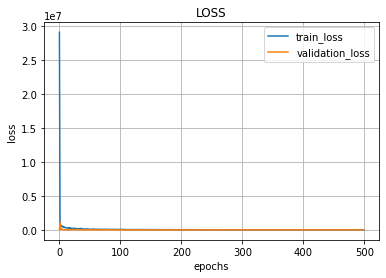

In [114]:
import matplotlib.pyplot as plt
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")

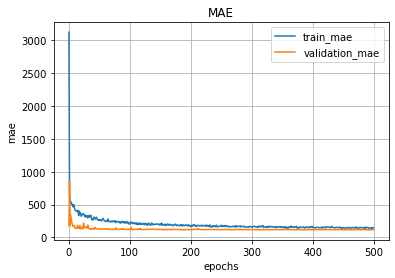

In [115]:
plt.title("MAE")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.grid()

plt.plot(result.history["mae"], label="train_mae")
plt.plot(result.history["val_mae"], label="validation_mae")
plt.legend(loc="best")

In [49]:
pd.DataFrame(model.predict(train_final_x))
check_answer = pd.concat([train_final_y, pd.DataFrame(model.predict(train_final_x))], axis=1)
check_answer["차이"]=abs(check_answer["등록차량수"]-check_answer[0])
check_answer

13/13 [==============================] - 0s 1ms/step


,등록차량수,0,차이
0,205.0,506.718658,301.718658
1,1064.0,1190.402344,126.402344
2,730.0,714.516479,15.483521
3,553.0,618.143799,65.143799
4,415.0,479.032928,64.032928
...,...,...,...
406,57.0,59.159637,2.159637
407,246.0,452.912567,206.912567
408,19.0,31.173964,12.173964
409,16.0,34.101921,18.101921


In [50]:
check_answer = check_answer.sort_values(by="차이", ascending=False)
check_answer["비율"]=check_answer["등록차량수"]/check_answer[0]
check_answer["비율1"]=check_answer[0]/check_answer["등록차량수"]
check_answer

,등록차량수,0,차이,비율,비율1
342,2550.0,1551.633667,998.366333,1.643429,0.608484
27,316.0,1035.664917,719.664917,0.305118,3.277421
64,376.0,1083.439941,707.439941,0.347043,2.881489
404,619.0,1281.428467,662.428467,0.483055,2.070159
56,839.0,1492.621704,653.621704,0.562098,1.779049
...,...,...,...,...,...
52,90.0,91.433098,1.433098,0.984326,1.015923
340,417.0,418.266083,1.266083,0.996973,1.003036
68,86.0,84.987595,1.012405,1.011912,0.988228
293,55.0,55.413689,0.413689,0.992535,1.007522


In [51]:
check_index = pd.concat([check_answer[check_answer["비율"]<=0.5],check_answer[check_answer["비율1"]>=1.5]], axis=1).index

In [52]:
len(check_index)

40

In [54]:
train_final.iloc[check_index].describe()

,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통,전용면적,법정주차대수
count,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.0000,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,758.475000,0.0,5.150000,5.475000,191.000000,236.275000,177.825000,147.0250,0.025000,0.075000,0.0,0.200000,507.950000,223.000000,0.552636,3.750000,43.308521,351.300000
std,511.886104,0.0,4.720658,28.538761,396.094524,215.550457,209.176883,325.8866,0.158114,0.266747,0.0,0.516398,368.598799,193.170842,0.377201,2.227451,10.211741,226.567497
min,26.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,13.000000,13.000000,0.000000,1.000000,23.156667,9.000000
25%,451.750000,0.0,1.750000,0.000000,0.000000,52.500000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,231.750000,87.750000,0.191069,2.000000,37.195172,183.000000
50%,614.500000,0.0,4.000000,0.000000,0.000000,209.000000,121.000000,1.0000,0.000000,0.000000,0.0,0.000000,470.500000,172.500000,0.635359,3.000000,43.973482,329.000000
75%,1000.000000,0.0,7.000000,0.000000,191.500000,364.500000,270.250000,142.2500,0.000000,0.000000,0.0,0.000000,673.750000,278.500000,0.986078,5.000000,48.978750,470.500000
max,2424.000000,0.0,15.000000,180.000000,1885.000000,774.000000,870.000000,1533.0000,1.000000,1.000000,0.0,2.000000,1493.000000,839.000000,1.000000,13.000000,69.338182,1034.000000


In [136]:
train_final["주차면수_평균"]=(train_final["법정주차대수"]+train_final["주차면수"])/2
train_final

,단지코드,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통,전용면적,법정주차대수,주차면수_평균
0,C2515,545,0,2,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211,3.0,44.345714,258.0,441.0
1,C1407,1216,0,6,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724,2.0,41.253636,578.0,931.5
2,C1945,755,0,1,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881,4.0,50.510000,447.0,590.5
3,C1470,696,0,12,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943,2.0,42.982500,367.0,506.0
4,C1898,566,0,12,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799,6.0,42.575000,285.0,401.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,C2586,90,0,13,12,42,36,0,0,0,0,0,0,66.0,57.0,1.000000,3.0,26.616000,31.0,48.5
407,C2035,492,0,0,0,156,156,180,0,0,0,0,0,521.0,246.0,0.634146,1.0,36.150000,222.0,371.5
408,C2020,40,0,7,20,5,15,0,0,0,0,0,0,25.0,19.0,1.000000,3.0,26.616667,12.0,18.5
409,C2437,90,0,15,0,90,0,0,0,0,0,0,0,30.0,16.0,1.000000,1.0,24.830000,26.0,28.0


In [46]:
from sklearn.preprocessing import 
train_final_x

,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,소형주택,대중교통,전용면적,법정주차대수
0,545,0,2,0,0,356,57,132,0,0,0,0,624.0,0.653211,3.0,44.345714,258.0
1,1216,0,6,0,0,390,702,124,0,0,0,0,1285.0,0.320724,2.0,41.253636,578.0
2,755,0,1,0,0,240,0,515,0,0,0,0,734.0,0.317881,4.0,50.510000,447.0
3,696,0,12,0,0,254,196,246,0,0,0,0,645.0,0.364943,2.0,42.982500,367.0
4,566,0,12,0,0,271,209,86,0,0,0,0,517.0,0.478799,6.0,42.575000,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,90,0,13,12,42,36,0,0,0,0,0,0,66.0,1.000000,3.0,26.616000,31.0
407,492,0,0,0,156,156,180,0,0,0,0,0,521.0,0.634146,1.0,36.150000,222.0
408,40,0,7,20,5,15,0,0,0,0,0,0,25.0,1.000000,3.0,26.616667,12.0
409,90,0,15,0,90,0,0,0,0,0,0,0,30.0,1.000000,1.0,24.830000,26.0


In [138]:
result = model.fit(train_final_x, train_final_y, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
13/13 [==============================] - 0s 7ms/step - loss: 45623.8945 - mae: 139.9560 - val_loss: 25142.8848 - val_mae: 115.8161
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 44114.3789 - mae: 146.3348 - val_loss: 24561.8887 - val_mae: 115.6023
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 41747.3281 - mae: 143.2406 - val_loss: 24486.4414 - val_mae: 115.2541
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 43562.5195 - mae: 141.5980 - val_loss: 24371.4141 - val_mae: 114.3835
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 44397.5273 - mae: 145.1639 - val_loss: 24201.2266 - val_mae: 113.9986
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 47804.2617 - mae: 146.7595 - val_loss: 24381.9785 - val_mae: 114.9044
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 45822.2969 - mae: 143.4492 - val_loss: 24569.0332 - val_mae: 115.4756

Epoch 58/500
13/13 [==============================] - 0s 5ms/step - loss: 41193.8398 - mae: 141.4514 - val_loss: 24351.5273 - val_mae: 117.0614
Epoch 59/500
13/13 [==============================] - 0s 4ms/step - loss: 38186.9062 - mae: 135.6175 - val_loss: 24349.4707 - val_mae: 115.8621
Epoch 60/500
13/13 [==============================] - 0s 5ms/step - loss: 44155.5430 - mae: 144.4659 - val_loss: 24430.0996 - val_mae: 116.1511
Epoch 61/500
13/13 [==============================] - 0s 4ms/step - loss: 48853.7891 - mae: 144.4579 - val_loss: 24278.6328 - val_mae: 115.9513
Epoch 62/500
13/13 [==============================] - 0s 4ms/step - loss: 38231.5430 - mae: 138.7547 - val_loss: 24392.3613 - val_mae: 116.1175
Epoch 63/500
13/13 [==============================] - 0s 5ms/step - loss: 42224.6523 - mae: 145.4906 - val_loss: 24037.8789 - val_mae: 114.6448
Epoch 64/500
13/13 [==============================] - 0s 5ms/step - loss: 43212.4922 - mae: 141.5628 - val_loss: 24043.6094 - val_mae: 1

Epoch 115/500
13/13 [==============================] - 0s 5ms/step - loss: 42273.8477 - mae: 144.6292 - val_loss: 24514.1680 - val_mae: 116.2749
Epoch 116/500
13/13 [==============================] - 0s 5ms/step - loss: 44603.0938 - mae: 139.9510 - val_loss: 24400.0801 - val_mae: 115.5462
Epoch 117/500
13/13 [==============================] - 0s 6ms/step - loss: 44032.6406 - mae: 139.1653 - val_loss: 24504.8438 - val_mae: 115.8432
Epoch 118/500
13/13 [==============================] - 0s 5ms/step - loss: 41072.1523 - mae: 140.8306 - val_loss: 24345.5957 - val_mae: 115.0730
Epoch 119/500
13/13 [==============================] - 0s 5ms/step - loss: 37686.5039 - mae: 139.5117 - val_loss: 24323.4277 - val_mae: 114.4165
Epoch 120/500
13/13 [==============================] - 0s 4ms/step - loss: 39174.9922 - mae: 137.9340 - val_loss: 24475.0938 - val_mae: 115.1946
Epoch 121/500
13/13 [==============================] - 0s 5ms/step - loss: 39756.5078 - mae: 137.0359 - val_loss: 24502.8047 - val

13/13 [==============================] - 0s 5ms/step - loss: 42536.4727 - mae: 140.7674 - val_loss: 24331.1016 - val_mae: 116.2408
Epoch 172/500
13/13 [==============================] - 0s 5ms/step - loss: 44420.6602 - mae: 143.9306 - val_loss: 24390.2637 - val_mae: 116.7756
Epoch 173/500
13/13 [==============================] - 0s 4ms/step - loss: 42837.1094 - mae: 140.4608 - val_loss: 24279.8594 - val_mae: 116.2278
Epoch 174/500
13/13 [==============================] - 0s 4ms/step - loss: 39956.5859 - mae: 136.1881 - val_loss: 24159.7305 - val_mae: 115.1642
Epoch 175/500
13/13 [==============================] - 0s 4ms/step - loss: 39836.1836 - mae: 136.7018 - val_loss: 24146.2266 - val_mae: 115.7383
Epoch 176/500
13/13 [==============================] - 0s 4ms/step - loss: 38986.5977 - mae: 139.0491 - val_loss: 24202.4492 - val_mae: 116.1277
Epoch 177/500
13/13 [==============================] - 0s 4ms/step - loss: 38961.8125 - mae: 136.3858 - val_loss: 24152.1094 - val_mae: 115.5515

13/13 [==============================] - 0s 4ms/step - loss: 38639.9453 - mae: 134.0959 - val_loss: 24358.1289 - val_mae: 115.9975
Epoch 228/500
13/13 [==============================] - 0s 4ms/step - loss: 39978.8242 - mae: 136.0157 - val_loss: 24397.6816 - val_mae: 115.7913
Epoch 229/500
13/13 [==============================] - 0s 4ms/step - loss: 34785.1094 - mae: 133.5994 - val_loss: 24254.1621 - val_mae: 115.2828
Epoch 230/500
13/13 [==============================] - 0s 4ms/step - loss: 42866.2695 - mae: 137.6136 - val_loss: 24451.6934 - val_mae: 116.0274
Epoch 231/500
13/13 [==============================] - 0s 4ms/step - loss: 37361.2930 - mae: 134.1508 - val_loss: 24491.4180 - val_mae: 117.1854
Epoch 232/500
13/13 [==============================] - 0s 4ms/step - loss: 39465.9727 - mae: 133.9906 - val_loss: 24485.2109 - val_mae: 116.6165
Epoch 233/500
13/13 [==============================] - 0s 5ms/step - loss: 37370.1523 - mae: 134.0686 - val_loss: 24496.9375 - val_mae: 116.0599

13/13 [==============================] - 0s 4ms/step - loss: 38115.2539 - mae: 134.4761 - val_loss: 24973.1895 - val_mae: 118.1979
Epoch 284/500
13/13 [==============================] - 0s 4ms/step - loss: 35393.4180 - mae: 132.5685 - val_loss: 24599.6504 - val_mae: 116.9729
Epoch 285/500
13/13 [==============================] - 0s 4ms/step - loss: 35605.9688 - mae: 133.1107 - val_loss: 24412.8223 - val_mae: 115.1218
Epoch 286/500
13/13 [==============================] - 0s 4ms/step - loss: 39588.3398 - mae: 135.8775 - val_loss: 24378.8320 - val_mae: 114.7585
Epoch 287/500
13/13 [==============================] - 0s 4ms/step - loss: 39464.2617 - mae: 129.1452 - val_loss: 24396.7070 - val_mae: 115.4929
Epoch 288/500
13/13 [==============================] - 0s 4ms/step - loss: 40929.3633 - mae: 136.4530 - val_loss: 24362.4043 - val_mae: 115.6388
Epoch 289/500
13/13 [==============================] - 0s 4ms/step - loss: 37335.8594 - mae: 129.0781 - val_loss: 24358.3652 - val_mae: 115.9079

13/13 [==============================] - 0s 6ms/step - loss: 34787.3594 - mae: 126.6676 - val_loss: 24070.5059 - val_mae: 114.6233
Epoch 340/500
13/13 [==============================] - 0s 5ms/step - loss: 42842.2734 - mae: 136.2287 - val_loss: 24099.6465 - val_mae: 114.7156
Epoch 341/500
13/13 [==============================] - 0s 5ms/step - loss: 40041.8203 - mae: 137.5899 - val_loss: 24102.8047 - val_mae: 114.9605
Epoch 342/500
13/13 [==============================] - 0s 5ms/step - loss: 34010.8359 - mae: 124.1314 - val_loss: 24236.5566 - val_mae: 115.3387
Epoch 343/500
13/13 [==============================] - 0s 5ms/step - loss: 37667.2578 - mae: 133.4192 - val_loss: 24020.9551 - val_mae: 114.1841
Epoch 344/500
13/13 [==============================] - 0s 6ms/step - loss: 34531.3477 - mae: 125.6698 - val_loss: 24034.2637 - val_mae: 114.8040
Epoch 345/500
13/13 [==============================] - 0s 4ms/step - loss: 37499.2891 - mae: 135.2275 - val_loss: 23997.3008 - val_mae: 114.4925

13/13 [==============================] - 0s 4ms/step - loss: 35502.9961 - mae: 125.5475 - val_loss: 24232.9961 - val_mae: 115.7319
Epoch 396/500
13/13 [==============================] - 0s 5ms/step - loss: 34107.0234 - mae: 131.0921 - val_loss: 24190.8262 - val_mae: 115.4888
Epoch 397/500
13/13 [==============================] - 0s 5ms/step - loss: 36389.9766 - mae: 127.5150 - val_loss: 24108.0488 - val_mae: 115.2236
Epoch 398/500
13/13 [==============================] - 0s 4ms/step - loss: 38447.9531 - mae: 136.4772 - val_loss: 24058.5215 - val_mae: 115.6238
Epoch 399/500
13/13 [==============================] - 0s 4ms/step - loss: 44138.8320 - mae: 140.3331 - val_loss: 23947.9160 - val_mae: 114.6095
Epoch 400/500
13/13 [==============================] - 0s 5ms/step - loss: 36843.4023 - mae: 132.3981 - val_loss: 24002.9277 - val_mae: 115.0815
Epoch 401/500
13/13 [==============================] - 0s 6ms/step - loss: 42452.1602 - mae: 137.2955 - val_loss: 24231.0488 - val_mae: 116.3005

13/13 [==============================] - 0s 4ms/step - loss: 37153.0820 - mae: 129.5807 - val_loss: 24045.0176 - val_mae: 114.8993
Epoch 452/500
13/13 [==============================] - 0s 4ms/step - loss: 37330.6367 - mae: 132.0989 - val_loss: 23976.9688 - val_mae: 114.9420
Epoch 453/500
13/13 [==============================] - 0s 4ms/step - loss: 34557.1484 - mae: 125.9072 - val_loss: 23938.4570 - val_mae: 114.8880
Epoch 454/500
13/13 [==============================] - 0s 4ms/step - loss: 36437.6289 - mae: 131.0088 - val_loss: 23789.0508 - val_mae: 114.5436
Epoch 455/500
13/13 [==============================] - 0s 7ms/step - loss: 35654.9375 - mae: 129.2861 - val_loss: 23679.1582 - val_mae: 113.7062
Epoch 456/500
13/13 [==============================] - 0s 7ms/step - loss: 40917.6758 - mae: 138.7014 - val_loss: 23759.7949 - val_mae: 114.4956
Epoch 457/500
13/13 [==============================] - 0s 4ms/step - loss: 38618.7891 - mae: 134.9023 - val_loss: 23847.4668 - val_mae: 114.4108

In [139]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train_final_y, model.predict(train_final_x)))
# 172.73436657472547

13/13 [==============================] - 0s 1ms/step


172.0655357143442

In [116]:
np.sqrt(29194.0781)

170.86274637848942

In [70]:
from sklearn.linear_model import Ridge

ridge01 = Ridge(alpha=1).fit(X_train, y_train)
Ridge_prediction = ridge01.predict(X_val)

from sklearn.metrics import mean_squared_error
ridge01_mse = mean_squared_error(y_val, Ridge_prediction)
ridge01_mse

33580.239505129844

In [71]:
np.sqrt(ridge01_mse)

183.24911870219142

In [84]:
print(ridge01.score(X_train, y_train))
ridge01.score(X_val,y_val)

0.8215348885064395


0.8087240602218915

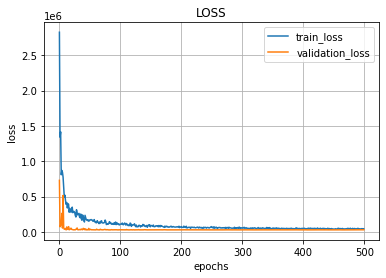

In [77]:
import matplotlib.pyplot as plt
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")

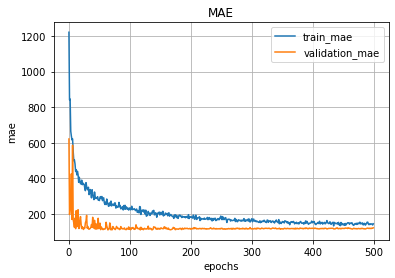

In [78]:
plt.title("MAE")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.grid()

plt.plot(result.history["mae"], label="train_mae")
plt.plot(result.history["val_mae"], label="validation_mae")
plt.legend(loc="best")

In [132]:
pd.DataFrame(model.predict(train_final_x))
check_answer = pd.concat([train_final_y, pd.DataFrame(model.predict(train_final_x))], axis=1)
check_answer["차이"]=abs(check_answer["등록차량수"]-check_answer[0])
check_answer

13/13 [==============================] - 0s 1ms/step


,등록차량수,0,차이
0,205.0,505.260803,300.260803
1,1064.0,1128.493164,64.493164
2,730.0,729.291443,0.708557
3,553.0,603.918762,50.918762
4,415.0,457.471497,42.471497
...,...,...,...
406,57.0,47.969688,9.030312
407,246.0,420.260193,174.260193
408,19.0,23.854309,4.854309
409,16.0,19.465401,3.465401


In [133]:
check_answer = check_answer.sort_values(by="차이", ascending=False)
check_answer["비율"]=check_answer["등록차량수"]/check_answer[0]
check_answer["비율1"]=check_answer[0]/check_answer["등록차량수"]
check_answer

,등록차량수,0,차이,비율,비율1
342,2550.0,1418.690552,1131.309448,1.797432,0.556349
64,376.0,1116.655762,740.655762,0.336720,2.969829
27,316.0,1045.208740,729.208740,0.302332,3.307623
56,839.0,1537.233765,698.233765,0.545786,1.832221
404,619.0,1198.429321,579.429321,0.516509,1.936073
...,...,...,...,...,...
67,204.0,202.540939,1.459061,1.007204,0.992848
144,413.0,413.896973,0.896973,0.997833,1.002172
301,410.0,409.169861,0.830139,1.002029,0.997975
2,730.0,729.291443,0.708557,1.000972,0.999029


TypeError: 'list' object is not callable

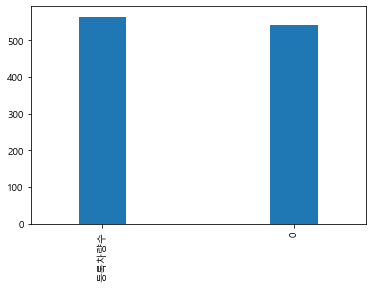

In [143]:
check_answer.mean()[:2].plot(kind="bar",width=0.25)
plt.xlabel("등록차량수")

In [131]:
check_answer.mean()[:2]

등록차량수    564.318735
0        537.574036
dtype: float64

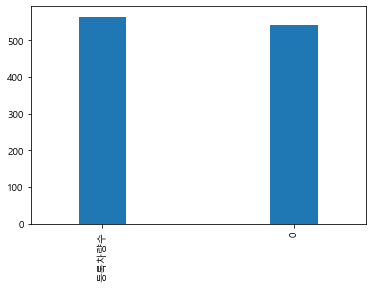

In [134]:
check_answer.mean()[:2].plot(kind="bar",width=0.25)
plt.xlabel=["등록차량수","예측값"]

In [135]:
check_answer.mean()[:2]

등록차량수    564.318735
0        540.618530
dtype: float64

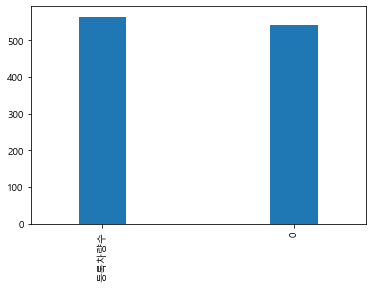

In [140]:
check_answer.mean()[:2].plot(kind="bar",width=0.25)
plt.xlabel=["등록차량수","예측값"]

In [141]:
check_answer.mean()[:2]

등록차량수    564.318735
0        540.618530
dtype: float64

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [81]:
check_index = pd.concat([check_answer[check_answer["비율"]<=0.5],check_answer[check_answer["비율1"]>=1.5]], axis=1).index

In [82]:
len(check_index)

34

In [83]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
predict = linear.predict(X_val)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, predict)
print(mse)
print(np.sqrt(mse))

33837.619351632624
183.95004580492125


In [85]:
from sklearn.linear_model import Lasso
linear = Lasso()
linear.fit(X_train, y_train)
predict = linear.predict(X_val)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, predict)
print(mse)
print(np.sqrt(mse))

32609.842253653354
180.5819543964827


C:\Users\gyeoa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.024e+06, tolerance: 4.666e+03
  model = cd_fast.enet_coordinate_descent(


In [86]:
print(linear.score(X_train, y_train))
linear.score(X_val, y_val)

0.820469983654794


0.8142515266417156